In [1]:
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,Lasso
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
%matplotlib inline

# So sorry that I have no time to add comments, basically I use logistic regressionCV to make a prediction if the salary is above average and get the coef for question 1 and I tried regression models to predict salary in question 2. I have indonesia data in my dataset, that is maybe a variance

In [2]:
df_job=pd.read_csv('./job_3_sal_after_cleaning.csv')

In [3]:
df_job.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df_job[df_job.country_code=='SG'].job_avg_salary.describe()

count      448.000000
mean      6446.939360
std       3115.674594
min       1750.000000
25%       4200.000000
50%       6000.000000
75%       7500.000000
max      22500.000000
Name: job_avg_salary, dtype: float64

In [5]:
df_job[df_job.country_code=='SG'].job_avg_salary.mean()

6446.939360119047

In [6]:
df_job['is_above_median']=0

In [7]:
for ind in df_job[df_job.country_code=='SG'].index:
    if df_job.job_avg_salary.loc[ind]>=df_job[df_job.country_code=='SG'].job_avg_salary.mean():
        df_job['is_above_median'].loc[ind]=1
    else:
        df_job['is_above_median'].loc[ind]=0

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
df_job[df_job.country_code=='ID'].job_avg_salary.describe()

count      64.000000
mean      816.319531
std       773.339561
min        99.000000
25%       424.125000
50%       652.500000
75%       905.625000
max      5670.000000
Name: job_avg_salary, dtype: float64

In [9]:
for ind in df_job[df_job.country_code=='ID'].index:
    if df_job.job_avg_salary.loc[ind]>=df_job[df_job.country_code=='ID'].job_avg_salary.mean():
        df_job['is_above_median'].loc[ind]=1
    else:
        df_job['is_above_median'].loc[ind]=0

In [10]:
df_job['text']=df_job['comp_tagline']+df_job['job_category']+df_job['job_seniority']+df_job['job_title']+df_job['skills_future']+df_job['job_description_concat']

In [11]:
X_col=[x for x in df_job.columns if x not in ['job_max_salary','job_min_salary','job_avg_salary','is_above_median','comp_tagline','job_category','job_seniority','job_title','skills_future','job_description_concat']]
y_col=['job_max_salary','job_min_salary','job_avg_salary','is_above_median']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_job[X_col], df_job[y_col],test_size=0.2, random_state=1)

In [13]:
X_train.head(1)

,country_code,job_type,min_year_exp,comp_tagline_tags,job_category_tags,job_seniority_tags,skills_future_tags,job_description_concat_tags,text
42,SG,part_time,3.0,35,5,1,38,3407,"['accurate', 'actions', 'application', 'asia',..."


In [14]:
stop = stopwords.words('english')

In [15]:
'''
naive-bayes
'''
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=stop, lowercase=True, strip_accents="unicode", ngram_range=(1,3))),
    ('tfidf', TfidfTransformer()),
    ('cls', MultinomialNB())
])

In [16]:
pipeline.fit(X_train.text, y_train.is_above_median)
predicted = pipeline.predict(X_test.text)
pipeline.score(X_test.text, y_test.is_above_median)

0.6699029126213593

In [17]:
predicted = pipeline.predict(X_test.text)
print(classification_report(y_test.is_above_median, predicted))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69        58
           1       0.60      0.71      0.65        45

   micro avg       0.67      0.67      0.67       103
   macro avg       0.67      0.67      0.67       103
weighted avg       0.68      0.67      0.67       103



In [18]:
'''
random forest
'''
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=stop, lowercase=True, strip_accents="unicode", ngram_range=(1,2))),
    ('tfidf', TfidfTransformer()),
    ('cls', RandomForestClassifier())
])

In [19]:
pipeline.fit(X_train.text, y_train.is_above_median)
predicted = pipeline.predict(X_test.text)
pipeline.score(X_test.text, y_test.is_above_median)

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7475728155339806

In [20]:
predicted = pipeline.predict(X_test.text)
print(classification_report(y_test.is_above_median, predicted))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        58
           1       0.74      0.64      0.69        45

   micro avg       0.75      0.75      0.75       103
   macro avg       0.75      0.74      0.74       103
weighted avg       0.75      0.75      0.74       103



In [21]:
'''
SVM
'''
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=stop, lowercase=True, strip_accents="unicode", ngram_range=(1,2))),
    ('tfidf', TfidfTransformer()),
    ('cls', SVC())
])

In [22]:
pipeline.fit(X_train.text, y_train.is_above_median)
predicted = pipeline.predict(X_test.text)
pipeline.score(X_test.text, y_test.is_above_median)

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5631067961165048

In [23]:
predicted = pipeline.predict(X_test.text)
print(classification_report(y_test.is_above_median, predicted))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72        58
           1       0.00      0.00      0.00        45

   micro avg       0.56      0.56      0.56       103
   macro avg       0.28      0.50      0.36       103
weighted avg       0.32      0.56      0.41       103



C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
'''
logistic regression
'''
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=stop, lowercase=True, strip_accents="unicode", ngram_range=(1,3))),
    ('tfidf', TfidfTransformer()),
    ('cls', LogisticRegression())
])

In [25]:
pipeline.fit(X_train.text, y_train.is_above_median)
predicted = pipeline.predict(X_test.text)
pipeline.score(X_test.text, y_test.is_above_median)

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7572815533980582

In [26]:
predicted = pipeline.predict(X_test.text)
print(classification_report(y_test.is_above_median, predicted))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79        58
           1       0.73      0.71      0.72        45

   micro avg       0.76      0.76      0.76       103
   macro avg       0.75      0.75      0.75       103
weighted avg       0.76      0.76      0.76       103



In [27]:
'''
logistic regressionCV
'''
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=stop, lowercase=True, strip_accents="unicode", ngram_range=(1,3))),
    ('tfidf', TfidfTransformer()),
    ('cls', LogisticRegressionCV())
])

In [28]:
pipeline.fit(X_train.text, y_train.is_above_median)
predicted = pipeline.predict(X_test.text)
pipeline.score(X_test.text, y_test.is_above_median)

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.7669902912621359

In [29]:
'''
3
'''
predicted = pipeline.predict(X_test.text)
print(classification_report(y_test.is_above_median, predicted))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        58
           1       0.71      0.78      0.74        45

   micro avg       0.77      0.77      0.77       103
   macro avg       0.76      0.77      0.77       103
weighted avg       0.77      0.77      0.77       103



In [30]:
pipeline.named_steps['vect'].get_feature_names()

['00',
 '00 000',
 '00 000 00',
 '00 12',
 '00 12 000',
 '00 17',
 '00 17 00',
 '00 18',
 '00 18 00',
 '00 500',
 '00 500 00',
 '00 fri',
 '00 fri 勤務日',
 '00 mon',
 '00 mon thu',
 '00 month',
 '00 monthexperience',
 '00 monthexperience data',
 '00 monthexperience group',
 '00 monthexperience solutions',
 '00 pm',
 '00 pm location',
 '000',
 '000 00',
 '000 00 000',
 '000 00 12',
 '000 00 500',
 '000 00 month',
 '000 00 monthexperience',
 '000 10',
 '000 10 000',
 '000 month',
 '000 month depending',
 '000 people',
 '000 people 50',
 '000 people worldwide',
 '000 products',
 '000 products client',
 '000 professionals',
 '000 professionals 100',
 '000 teachers',
 '000 teachers annually',
 '000 technologists',
 '000 technologists design',
 '000 working',
 '000 working hours',
 '00have',
 '00have knowledge',
 '00have knowledge linux',
 '00pm',
 '00pm ang',
 '00pm ang mo',
 '00x',
 '00x smaller',
 '00x smaller models',
 '01c4394',
 '01c4394 cei',
 '01c4394 cei registration',
 '01c4394 rcb',

In [31]:
pipeline.named_steps['tfidf'].idf_

array([4.53125051, 4.93671562, 4.93671562, ..., 6.32300998, 6.32300998,
       6.32300998])

In [32]:
pipeline.named_steps['cls'].coef_[0]

array([-0.42953116, -0.07256663, -0.07256663, ..., -0.21136863,
       -0.21136863, -0.21136863])

In [33]:
df_coef=pd.DataFrame(pipeline.named_steps['cls'].coef_[0],columns=['coef'])

In [34]:
df_coef['feature']=pipeline.named_steps['vect'].get_feature_names()

In [35]:
df_coef['abs_coef']=np.abs(pipeline.named_steps['cls'].coef_[0])

In [36]:
top_20_coef=df_coef.sort_values(by='abs_coef',ascending=False).head(23).copy()

In [37]:
top_20_coef.reset_index(inplace=True,drop=True)

In [38]:
top_20_coef.set_index('feature',inplace=True)

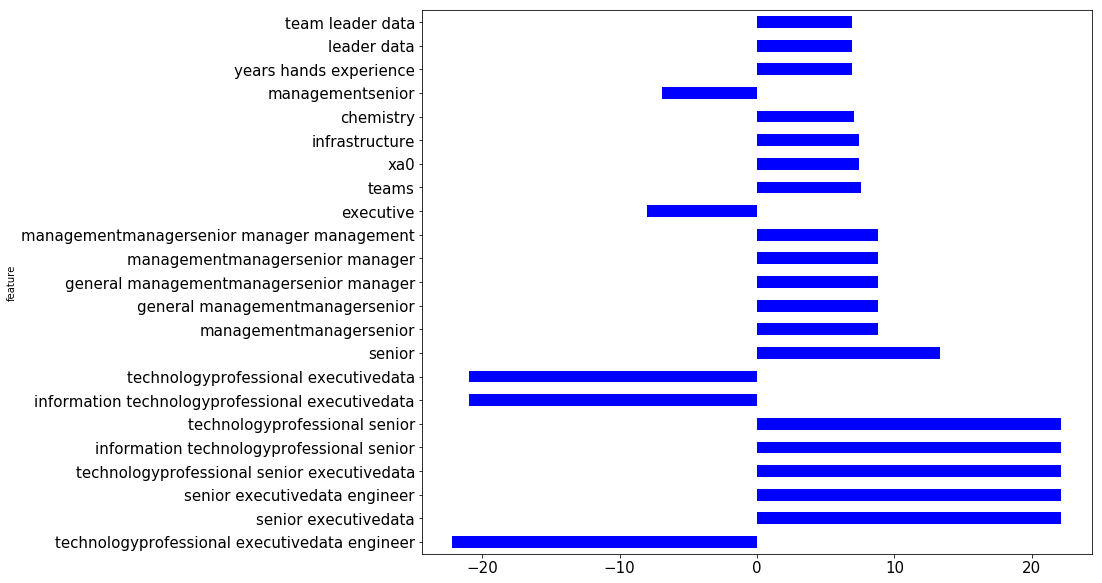

In [39]:
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
top_20_coef.coef.plot(kind='barh',color='b',figsize=(12,10))
plt.show()

In [40]:
pipeline.named_steps['cls'].intercept_

array([-4.01616329])

In [41]:
from sklearn.metrics import roc_curve

def plot_roc(y, probs, threshmarkers=None):
    fpr, tpr, thresh = roc_curve(y, probs)

    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, lw=2)
   
    plt.xlabel("False Positive Rate\n(1 - Specificity)")
    plt.ylabel("True Positive Rate\n(Sensitivity)")
    plt.xlim([-0.025, 1.025])
    plt.ylim([-0.025, 1.025])
    plt.xticks(np.linspace(0, 1, 21), rotation=45)
    plt.yticks(np.linspace(0, 1, 21))
    plt.show()

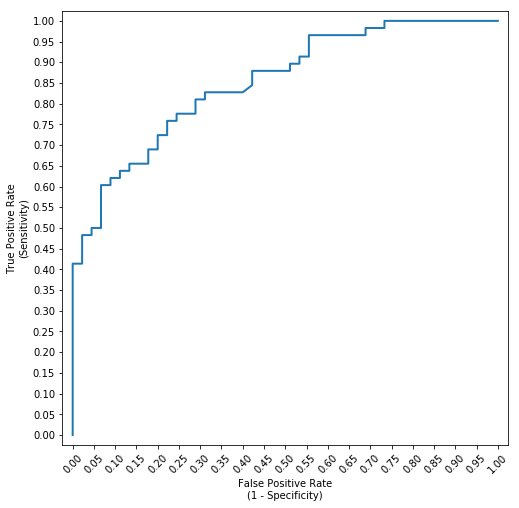

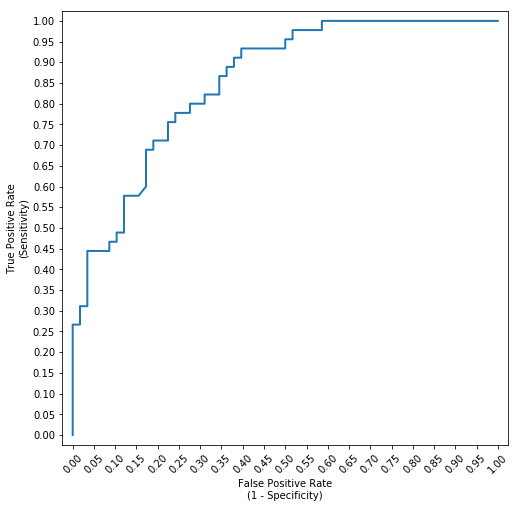

In [42]:
predicted_proba = pipeline.predict_proba(X_test.text)
plot_roc(y_test.is_above_median.apply(lambda x: x == 0), predicted_proba[:, list(pipeline.classes_).index(0)])
plot_roc(y_test.is_above_median.apply(lambda x: x == 1), predicted_proba[:, list(pipeline.classes_).index(1)])

# 2

In [43]:
df_job

,comp_tagline,country_code,job_category,job_max_salary,job_min_salary,job_seniority,job_title,job_type,min_year_exp,skills_future,job_description_concat,comp_tagline_tags,job_category_tags,job_seniority_tags,skills_future_tags,job_description_concat_tags,job_avg_salary,is_above_median,text
0,"['ability', 'accurate', 'activities', 'applica...",SG,"['accounting', 'environment', 'management', 's...",4000.0,2500.000000,['management'],credit control specialist,part_time,2.0,"['account', 'accounting', 'accounts', 'busines...",minimum diploma in any field\r\nminimum two-ye...,34,4,1,30,2948,3250.000000,0,"['ability', 'accurate', 'activities', 'applica..."
1,"['ability', 'according', 'advantage', 'applica...",SG,"['management', 'manufacturing', 'purchasing', ...",4000.0,2500.000000,"['junior', 'level', 'management']",junior supply planner,part_time,1.0,"['building', 'business', 'command', 'communica...","working location at central, outside of cbd\r\...",35,7,3,44,2884,3250.000000,0,"['ability', 'according', 'advantage', 'applica..."
2,"['asia', 'business', 'companies', 'company', '...",SG,"['information', 'logistics', 'management', 'se...",4000.0,2500.000000,['management'],business analyst,part_time,1.0,"['business', 'contract', 'data', 'delivery', '...",my client is a us multinational courier delive...,18,5,1,23,983,3250.000000,0,"['asia', 'business', 'companies', 'company', '..."
3,"['ability', 'advantage', 'analytics', 'busines...",SG,"['education', 'environment', 'health', 'inform...",6000.0,4000.000000,[],advanced data analyst,full_time,None,"['algorithms', 'analytics', 'artificial', 'ben...","company\r\ncanopy is a ""make sense of your dat...",43,7,0,31,2282,5000.000000,0,"['ability', 'advantage', 'analytics', 'busines..."
4,"['business', 'data', 'industry', 'information'...",SG,['information'],4000.0,2500.000000,[],site engineer,full_time,1.0,"['act', 'business', 'communications', 'complia...",industry: construction / mnclocation: marine ...,10,1,0,17,1369,3250.000000,0,"['business', 'data', 'industry', 'information'..."
5,"['data', 'group', 'market', 'pte']",SG,['service'],4000.0,2000.000000,[],freelance surveyor,part_time,None,"['applications', 'calling', 'cold', 'customer'...",freelance surveyor (up to $4000/o-levels & up)...,4,1,0,10,631,3000.000000,0,"['data', 'group', 'market', 'pte']['service'][..."
6,"['ai', 'analytics', 'application', 'asia', 'ba...",SG,"['banking', 'engineering', 'management', 'reta...",6000.0,4000.000000,['management'],computer vision software engineer,full_time,5.0,"['access', 'algorithms', 'analysis', 'analytic...",trakomatic is one of south east asia's fastest...,48,7,1,47,4948,5000.000000,0,"['ai', 'analytics', 'application', 'asia', 'ba..."
7,"['ability', 'based', 'clients', 'company', 'co...",SG,"['environment', 'information', 'insurance', 'm...",4000.0,2500.000000,[],helpdesk data analyst,part_time,2.0,"['analysis', 'based', 'communications', 'contr...","1 year contract\r\n$4000 monthly, great office...",27,5,0,25,1602,3250.000000,0,"['ability', 'based', 'clients', 'company', 'co..."
8,"['application', 'best', 'business', 'career', ...",SG,"['education', 'information', 'management', 're...",4000.0,3200.000000,['management'],it support engineer,full_time,2.0,"['administration', 'business', 'computer', 'co...",responsibilities: provide erp support and trou...,21,6,1,27,2057,3600.000000,0,"['application', 'best', 'business', 'career', ..."
9,"['code', 'data', 'design', 'development', 'fie...",SG,"['design', 'management', 'technology']",5000.0,4000.000000,"['executive', 'junior', 'management', 'manager']",programmer,full_time,1.0,"['computer', 'control', 'css', 'data', 'databa...",responsibilitiesdevelop programs to control ha...,17,3,4,28,1597,4500.000000,0,"['code', 'data', 'design', 'development', 'fie..."


In [44]:
df_job['job_factor']=df_job['job_title']+df_job['skills_future']

In [45]:
X2=df_job[['job_factor','country_code','job_type','min_year_exp','comp_tagline_tags','job_category_tags','job_seniority_tags','skills_future_tags','job_description_concat_tags']]
y2=df_job.job_avg_salary

In [46]:
pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words=stop, lowercase=True, strip_accents="unicode", ngram_range=(1,3))),
    #('tfidf', TfidfTransformer()),
    #('cls', RandomForestRegressor())
])


In [47]:
pipeline.fit(X2.job_factor, y2)
#predicted = pipeline.predict(X2_test.job_factor)
#pipeline.score(X2_test.job_factor, y2_test)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
...
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None))])

In [48]:
vect_skills_future=TfidfVectorizer(stop_words='english',lowercase=True,ngram_range=(1,3),max_features=20000)

In [49]:
vect_skills_future.fit(X2.job_factor.values)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=20000, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [50]:
token=vect_skills_future.transform(X2.job_factor.values)

In [51]:
vect_skills_future.get_feature_names()

['10',
 '10 month',
 '10 month contract',
 '110095',
 '110095 auditing',
 '110095 auditing accounting',
 '120416',
 '120416 management',
 '120416 management strategic',
 '1800',
 '1800 strategy',
 '1800 strategy financial',
 '180000dc',
 '180000dc strategic',
 '180000dc strategic planning',
 '1800016v',
 '1800016v market',
 '1800016v market research',
 '180001x5',
 '180001x5 management',
 '180001x5 management leadership',
 '180001zc',
 '180001zc management',
 '180001zc management leadership',
 '180002yv',
 '180002yv management',
 '180002yv management banking',
 '180003cw',
 '180003cw management',
 '180003cw management leadership',
 '180003l2',
 '180003l2 management',
 '180003l2 management leadership',
 '180003l2 management strategy',
 '180003y7',
 '180003y7 management',
 '180003y7 management leadership',
 '180003ye',
 '180003ye management',
 '180003ye management leadership',
 '180003ye management risk',
 '1800044u',
 '1800044u management',
 '1800044u management banking',
 '18000495',
 

In [52]:
df_sal=pd.DataFrame(token.toarray(),columns=vect_skills_future.get_feature_names())

In [53]:
col=pd.DataFrame(token.toarray(),columns=vect_skills_future.get_feature_names()).sum(axis=0).sort_values(ascending=False).head(30).keys()

In [54]:
X2_merge=X2.copy()
X2_merge.reset_index(drop=True,inplace=True)
X2_new=df_sal[col].join(X2_merge[[x for x in X2.columns if x not in ['job_factor']]])
X2_new=X2_new.join(pd.get_dummies(X2_new.country_code, drop_first=True))
X2_new=X2_new.join(pd.get_dummies(X2_new.job_type, drop_first=True))
X2_new=X2_new.join(pd.get_dummies(X2_new.min_year_exp, drop_first=True))
X2_new.drop(['country_code','job_type','min_year_exp'],axis=1,inplace=True)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_new,y2,test_size=0.4, random_state=1)

In [55]:
rf=RandomForestRegressor()

In [56]:
rf.fit(X2_train,y2_train)

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [57]:
rf.score(X2_train,y2_train)

0.9179108943424094

In [58]:
cross_val_score(rf,X2_train,y2_train,cv=20).mean()

0.38336362659133805

In [59]:
cross_val_score(rf,X2_test,y2_test,cv=20)

array([ 0.45067022,  0.33421448,  0.05326054,  0.68514199,  0.42751546,
        0.70651698,  0.77216461,  0.88777036,  0.55587808, -0.02879626,
        0.77761209,  0.08366426,  0.77750258,  0.68652995,  0.2404274 ,
        0.30431349,  0.39118696, -0.13913765,  0.65346536,  0.43623626])

In [60]:
cross_val_score(rf,X2_test,y2_test,cv=20).mean()

0.39519876951660843

In [61]:
abr=AdaBoostRegressor()

In [62]:
abr.fit(X2_train,y2_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [63]:
cross_val_score(abr,X2_train,y2_train,cv=20).mean()

0.3444014358794254

In [64]:
cross_val_score(abr,X2_test,y2_test,cv=20).mean()

0.39801807553765206

In [65]:
las=Lasso()

In [66]:
las.fit(X2_train,y2_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [67]:
cross_val_score(las,X2_train,y2_train,cv=20).mean()

0.4048476259243179

In [68]:
cross_val_score(las,X2_test,y2_test,cv=20).mean()

0.34634619208295697